# HW1: SIR and SEIR Model Implementation for Pandemic Spread
# Author: Kimia Ramezan

## Part A – SIR Model Implementation

In this part, we implement the **SIR epidemiological model** as a system of ODEs, and write code to **numerically simulate** it over time.

The SIR model divides the population into three compartments:

- S(t) \: Susceptible individuals  
- I(t) \: Infected individuals  
- R(t) \: Recovered (or removed) individuals  

The total population is:
\[
N = S(t) + I(t) + R(t)
\]

We assume a closed population (no births or deaths unrelated to the disease), so \(N\) stays constant over time.


## Numerical Solution Approach

The SIR model does not always have a simple closed-form solution, so we solve it **numerically**.

Here, we implement:

1. A function `sir_derivatives(S, I, R, beta, gamma)` that returns the time derivatives \(dS/dt, dI/dt, dR/dt\).
2. A function `simulate_sir(...)` that uses a **4th-order Runge–Kutta (RK4)** method to simulate the system over time.

RK4 is a standard ODE integration method that is **more accurate and stable** than simple Euler integration, while still being straightforward to implement.



In [2]:
import numpy as np

def sir_derivatives(S, I, R, beta, gamma):
    """
    Returns:
    dSdt, dIdt, dRdt : tuple of floats
    """
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


def simulate_sir(S0, I0, R0, beta, gamma, t_max, dt=0.1):
    """
    Simulate the SIR model using a RK4 method.
    Returns:
    t - S - I - R
    """
    t = np.arange(0, t_max + dt, dt)
    n_steps = len(t)
    S = np.zeros(n_steps)
    I = np.zeros(n_steps)
    R = np.zeros(n_steps)
    
    #initial conditions
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for k in range(n_steps - 1):
        Sk, Ik, Rk = S[k], I[k], R[k]
        
        #k1
        dS1, dI1, dR1 = sir_derivatives(Sk, Ik, Rk, beta, gamma)
        
        #k2
        dS2, dI2, dR2 = sir_derivatives(
            Sk + 0.5 * dt * dS1,
            Ik + 0.5 * dt * dI1,
            Rk + 0.5 * dt * dR1,
            beta, gamma
        )
        
        #k3
        dS3, dI3, dR3 = sir_derivatives(
            Sk + 0.5 * dt * dS2,
            Ik + 0.5 * dt * dI2,
            Rk + 0.5 * dt * dR2,
            beta, gamma
        )
        
        #k4
        dS4, dI4, dR4 = sir_derivatives(
            Sk + dt * dS3,
            Ik + dt * dI3,
            Rk + dt * dR3,
            beta, gamma
        )
        
        #combine increments
        S[k + 1] = Sk + (dt / 6.0) * (dS1 + 2*dS2 + 2*dS3 + dS4)
        I[k + 1] = Ik + (dt / 6.0) * (dI1 + 2*dI2 + 2*dI3 + dI4)
        R[k + 1] = Rk + (dt / 6.0) * (dR1 + 2*dR2 + 2*dR3 + dR4)
    
    return t, S, I, R


## Part B – SIR Model Simulation

We now simulate the SIR model over a period of **150 days** with the following initial
conditions and parameters, for a total population of \(N = 1000\) individuals:

- Initial populations: $S(0) = 999,\; I(0) = 1,\; R(0) = 0$
- Transmission rate: $\beta = 0.3 \times 10^{-3}$
- Recovery rate: $\gamma = 0.1$

Using the `simulate_sir` function from Part A, we solve the SIR equations numerically and
plot the dynamics of \(S(t)\), \(I(t)\), and \(R(t)\) over time. Each curve is labelled
to indicate the compartment it represents.


Approx. total population at end: 1000.0


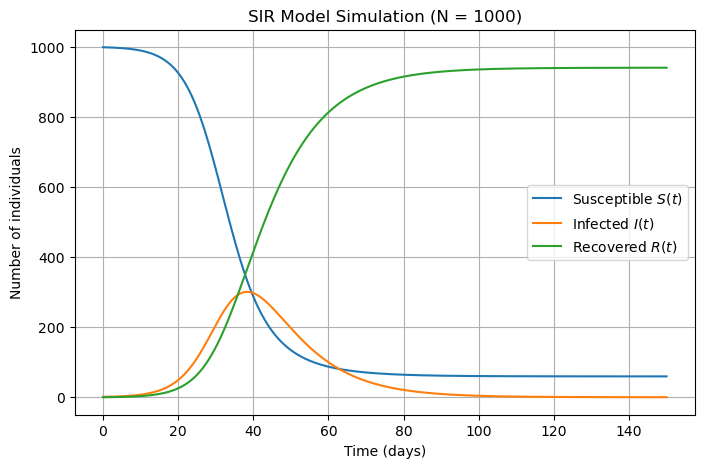

In [3]:
import matplotlib.pyplot as plt

S0 = 999       
I0 = 1         
R0 = 0        
beta = 0.3e-3  
gamma = 0.1   
#days
t_max = 150
#time step    
dt = 0.1       

t, S, I, R = simulate_sir(S0, I0, R0, beta, gamma, t_max=t_max, dt=dt)

N = S + I + R
print("Approx. total population at end:", N[-1])

plt.figure(figsize=(8, 5))
plt.plot(t, S, label="Susceptible $S(t)$")
plt.plot(t, I, label="Infected $I(t)$")
plt.plot(t, R, label="Recovered $R(t)$")

plt.xlabel("Time (days)")
plt.ylabel("Number of individuals")
plt.title("SIR Model Simulation (N = 1000)")
plt.legend()
plt.grid(True)

plt.show()


### Interpretation of the SIR Dynamics

The plot shows the typical behaviour of an SIR epidemic:

- The **susceptible** curve \(S(t)\) starts near 1000 and decreases as individuals become infected.
- The **infected** curve \(I(t)\) initially rises from the single infected individual, reaches a peak
  when there are still enough susceptibles to sustain transmission, and then declines as recovery dominates.
- The **recovered** curve \(R(t)\) increases over time as infected individuals recover and accumulate
  in the recovered compartment.

Throughout the simulation, the total population \(S(t) + I(t) + R(t)\) remains approximately constant
(at 1000), which is consistent with the closed-population assumption of the SIR model.


In [4]:
import numpy as np
#(i)
peak_index = np.argmax(I)
t_peak = t[peak_index]
I_peak = I[peak_index]

print(f"Peak infected at t ≈ {t_peak:.1f} days")
print(f"Maximum number of infected individuals I(t_peak) ≈ {I_peak:.0f}")

#(ii)
R0 = beta * S0 / gamma
print(f"Basic reproductive number R0 ≈ {R0:.2f}")


Peak infected at t ≈ 38.4 days
Maximum number of infected individuals I(t_peak) ≈ 301
Basic reproductive number R0 ≈ 3.00


## Part C – Analysis and Interpretation

### (i) Infection peak

From the simulation, the number of infected people \(I(t)\) is highest at
about **$t \approx 38.4$ days**, with around **\(301\)** infected individuals.

At the beginning, almost everyone is susceptible, so each infected person can
easily pass on the disease. This makes \(I(t)\) grow quickly. As more people get
infected and then recover, the susceptible group \(S(t)\) becomes smaller. After
a while, there are not enough susceptibles left for each infected person to
infect more than one new person, so the curve \(I(t)\) reaches its peak and then
starts to go down.

---

### (ii) Basic reproductive number \(R_0\)

The **basic reproductive number** \(R_0\) tells us how many new infections one
infected person causes at the very start of the outbreak, when everyone else is
susceptible. In this model we use

$
R_0 = \frac{\beta S(0)}{\gamma}$.


With $S(0) = 999$, $\beta = 0.3 \times 10^{-3}$, and $gamma = 0.1$, we get

$
R_0 \approx 3.00.
$

So, on average, one infected person infects about **three** new people at the
start. Because \(R_0 > 1\), the infection can spread and create a large wave of
cases, which matches what we see in the plot.

---

### (iii) Pandemic dynamics

The three curves show how the disease moves through the population:

- **Susceptible \(S(t)\)**: starts near 1000 and goes down as people become
  infected. The fastest drop happens when there are many infected people.

- **Infected \(I(t)\)**: starts from 1 person, grows quickly, reaches a peak
  around day 38.4, and then falls as fewer people are left to infect and more
  people recover.

- **Recovered \(R(t)\)**: starts at 0 and increases all the time, as infected
  people recover. It eventually levels off at a high value, meaning most people
  have been infected and then recovered.

Together, these curves show a typical epidemic: fast growth at first, a clear
peak in infections, and then a slow end as immunity builds up in the population.


## Part D – SEIR Model with Births and Deaths

We now extend the SIR model to a **SEIR model with demography** (births and deaths).



In [5]:
import numpy as np

def seir_derivatives(S, E, I, R, beta, gamma, sigma, mu):
    """
    Compute the derivatives dS/dt, dE/dt, dI/dt, dR/dt 
    """
    N = S + E + I + R  # total population (can change slightly due to numerics)

    dSdt = mu * N - beta * S * I - mu * S
    dEdt = beta * S * I - (sigma + mu) * E
    dIdt = sigma * E - (gamma + mu) * I
    dRdt = gamma * I - mu * R

    return dSdt, dEdt, dIdt, dRdt


def simulate_seir(S0, E0, I0, R0, beta, gamma, sigma, mu, t_max, dt=0.1):
    """
    Simulate the SEIR model using a RK4 method.
    """
    t = np.arange(0, t_max + dt, dt)
    n_steps = len(t)
    S = np.zeros(n_steps)
    E = np.zeros(n_steps)
    I = np.zeros(n_steps)
    R = np.zeros(n_steps)
    S[0], E[0], I[0], R[0] = S0, E0, I0, R0

    for k in range(n_steps - 1):
        Sk, Ek, Ik, Rk = S[k], E[k], I[k], R[k]

        #k1
        dS1, dE1, dI1, dR1 = seir_derivatives(Sk, Ek, Ik, Rk, beta, gamma, sigma, mu)

        #k2
        dS2, dE2, dI2, dR2 = seir_derivatives(
            Sk + 0.5 * dt * dS1,
            Ek + 0.5 * dt * dE1,
            Ik + 0.5 * dt * dI1,
            Rk + 0.5 * dt * dR1,
            beta, gamma, sigma, mu
        )

        #k3
        dS3, dE3, dI3, dR3 = seir_derivatives(
            Sk + 0.5 * dt * dS2,
            Ek + 0.5 * dt * dE2,
            Ik + 0.5 * dt * dI2,
            Rk + 0.5 * dt * dR2,
            beta, gamma, sigma, mu
        )

        #k4
        dS4, dE4, dI4, dR4 = seir_derivatives(
            Sk + dt * dS3,
            Ek + dt * dE3,
            Ik + dt * dI3,
            Rk + dt * dR3,
            beta, gamma, sigma, mu
        )

        S[k + 1] = Sk + (dt / 6.0) * (dS1 + 2*dS2 + 2*dS3 + dS4)
        E[k + 1] = Ek + (dt / 6.0) * (dE1 + 2*dE2 + 2*dE3 + dE4)
        I[k + 1] = Ik + (dt / 6.0) * (dI1 + 2*dI2 + 2*dI3 + dI4)
        R[k + 1] = Rk + (dt / 6.0) * (dR1 + 2*dR2 + 2*dR3 + dR4)

    return t, S, E, I, R


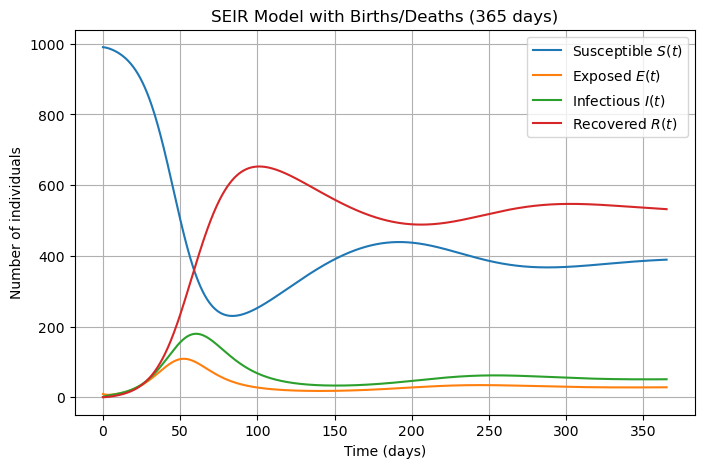

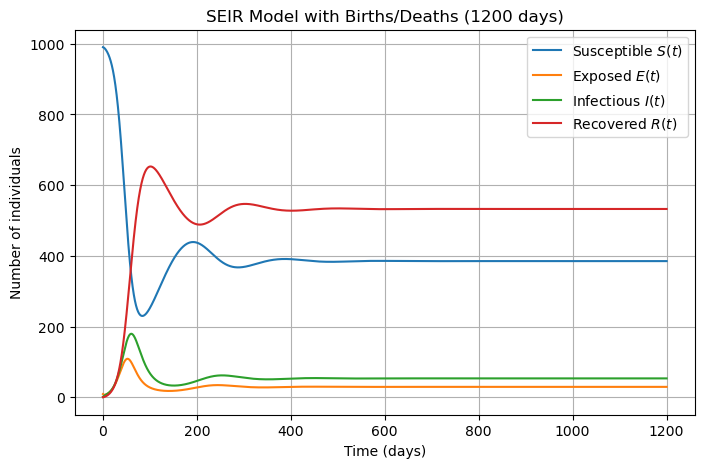

In [6]:
import matplotlib.pyplot as plt

S0 = 990
E0 = 9
I0 = 1
R0 = 0
beta = 0.3e-3
gamma = 0.1
sigma = 0.2
mu = 0.01
dt = 0.1

#simulation over 365 days
t1, S1, E1, I1, R1 = simulate_seir(S0, E0, I0, R0,
                                   beta, gamma, sigma, mu,
                                   t_max=365, dt=dt)

plt.figure(figsize=(8, 5))
plt.plot(t1, S1, label="Susceptible $S(t)$")
plt.plot(t1, E1, label="Exposed $E(t)$")
plt.plot(t1, I1, label="Infectious $I(t)$")
plt.plot(t1, R1, label="Recovered $R(t)$")

plt.xlabel("Time (days)")
plt.ylabel("Number of individuals")
plt.title("SEIR Model with Births/Deaths (365 days)")
plt.legend()
plt.grid(True)
plt.show()

#simulation over 1200 days
t2, S2, E2, I2, R2 = simulate_seir(S0, E0, I0, R0,
                                   beta, gamma, sigma, mu,
                                   t_max=1200, dt=dt)

plt.figure(figsize=(8, 5))
plt.plot(t2, S2, label="Susceptible $S(t)$")
plt.plot(t2, E2, label="Exposed $E(t)$")
plt.plot(t2, I2, label="Infectious $I(t)$")
plt.plot(t2, R2, label="Recovered $R(t)$")

plt.xlabel("Time (days)")
plt.ylabel("Number of individuals")
plt.title("SEIR Model with Births/Deaths (1200 days)")
plt.legend()
plt.grid(True)
plt.show()


### (iii) Waves in the number of infections

In the SEIR model with births and deaths, the infectious curve \(I(t)\) no longer
shows a single peak and then goes to (almost) zero, like in the basic SIR model.

- On the **365-day plot**, there is a **first large wave** of infections early on
  (around 50–70 days), where \(I(t)\) rises sharply and then falls. After this, the
  number of infectious individuals becomes smaller but does not disappear. There is
  a **second, smaller bump** later in the year as the susceptible population grows
  again.

- On the **1200-day plot**, we see this even more clearly: the system has
  **repeated waves** of infection. The first wave is the largest, and later waves
  have smaller amplitude. Over time, the curves settle into an **endemic regime**
  where \(S(t)\), \(E(t)\), \(I(t)\), and \(R(t)\) fluctuate around roughly
  constant levels instead of going back to zero.

So, the model predicts that the disease does not just cause one outbreak and vanish.
Instead, it produces **damped waves of infection** that gradually approach a
long-term steady state.

---

### (iv) Effect of the exposed compartment and birth/death rates

**Exposed compartment \(E(t)\):**

- The exposed class represents people who have been infected but are **not yet
  infectious**. This builds a delay between infection and the ability to infect
  others.
- Because of this delay, the rise and fall of \(I(t)\) is smoother and shifted in
  time compared to the SIR model. The system reacts more slowly to changes in
  \(S(t)\), which helps create the oscillatory, wave-like behavior seen in the
  plots.

**Birth/death rate \(\mu\):**

- Births add new individuals directly into the susceptible group at rate
  \(\mu N\). This means that even after a big outbreak, the susceptible pool
  slowly **refills**, allowing new waves of infection.
- Deaths remove individuals from all compartments, including \(R(t)\). This stops
  the recovered group from dominating forever and keeps the total population
  roughly constant.
- Together, births and deaths prevent the disease from dying out completely and
  instead push the system toward an **endemic equilibrium**: infections persist at
  a lower level, and small waves can still occur.

In short, the **exposed compartment** adds a time delay that smooths and shifts
peaks, while **births and deaths** keep supplying new susceptibles and removing
immune individuals. This combination turns a single epidemic peak into a series of
damped waves that settle into a long-term endemic state.


## Part E – Sensitivity Analysis

We now study how changing the transmission rate $\beta$ and recovery rate $\gamma$ affects the SEIR model outcomes over one year (365 days).

- $\beta$ is varied from $0.1 \times 10^{-3}$ to $0.5 \times 10^{-3}$.

- $\gamma$ is varied from \(0.05\) to \(0.2\).

For each $\beta$,$\gamma$ pair we will:
1. Simulate the SEIR model for 365 days.
2. Record the **peak number of infectious individuals**.
3. Approximate the **total number of infections over the year**.


In [7]:
beta_values = np.linspace(0.1e-3, 0.5e-3, 5)  
gamma_values = np.linspace(0.05, 0.2, 5)       

peak_I = np.zeros((len(gamma_values), len(beta_values)))
total_infections = np.zeros((len(gamma_values), len(beta_values)))

t_max = 365
dt = 0.1

for i, gamma_val in enumerate(gamma_values):
    for j, beta_val in enumerate(beta_values):
        t, S, E, I, R = simulate_seir(
            S0, E0, I0, R0,
            beta=beta_val,
            gamma=gamma_val,
            sigma=sigma,
            mu=mu,
            t_max=t_max,
            dt=dt
        )

        #peak number of infectious individuals
        peak_I[i, j] = np.max(I)

        #approximate total infections over the year
        #    we count everyone who has ever been infected:
        #    E + I + R minus initial (E0 + I0 + R0)
        total_infections[i, j] = (E[-1] + I[-1] + R[-1]) - (E0 + I0 + R0)

peak_I, total_infections


(array([[ 93.65043383, 283.96015762, 382.20356231, 439.58637962,
         476.55495007],
        [  6.34181323, 120.72976764, 217.51331126, 281.24838241,
         325.13322724],
        [  5.03503832,  41.24602433, 120.17988019, 180.77953855,
         225.47444451],
        [  4.33878379,   8.12727123,  61.54162236, 114.17628357,
         156.30695567],
        [  3.85785545,   4.4458338 ,  27.29065804,  69.50736694,
         107.16879002]]),
 array([[362.94711507, 678.01457001, 779.67660033, 832.52002104,
         864.00368316],
        [ 14.2220382 , 485.99328887, 644.29154151, 734.74253231,
         785.39687857],
        [ -8.77629523, 257.47581653, 525.4185656 , 631.29902341,
         708.73008765],
        [ -9.33811571,  93.36350671, 401.83666134, 527.64453551,
         628.60412604],
        [ -9.48639821,  -3.81135318, 234.35405672, 450.90223542,
         537.20609737]]))

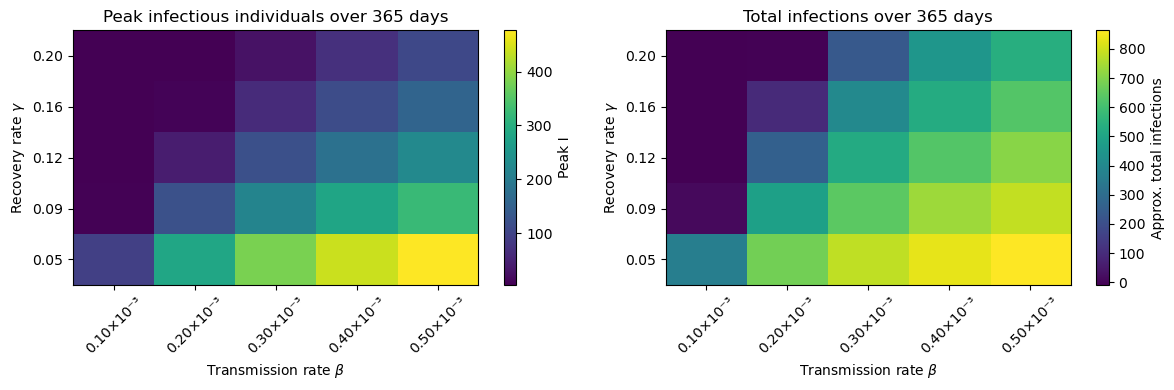

In [8]:
beta_labels = [f"{b*1e3:.2f}×10⁻³" for b in beta_values]  # just for nicer display
gamma_labels = [f"{g:.2f}" for g in gamma_values]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#heatmap of peak infections
im1 = axes[0].imshow(peak_I, aspect="auto", origin="lower")
axes[0].set_xticks(range(len(beta_values)))
axes[0].set_yticks(range(len(gamma_values)))
axes[0].set_xticklabels(beta_labels, rotation=45)
axes[0].set_yticklabels(gamma_labels)
axes[0].set_xlabel(r"Transmission rate $\beta$")
axes[0].set_ylabel(r"Recovery rate $\gamma$")
axes[0].set_title("Peak infectious individuals over 365 days")
fig.colorbar(im1, ax=axes[0], label="Peak I")

#heatmap of total infections
im2 = axes[1].imshow(total_infections, aspect="auto", origin="lower")
axes[1].set_xticks(range(len(beta_values)))
axes[1].set_yticks(range(len(gamma_values)))
axes[1].set_xticklabels(beta_labels, rotation=45)
axes[1].set_yticklabels(gamma_labels)
axes[1].set_xlabel(r"Transmission rate $\beta$")
axes[1].set_ylabel(r"Recovery rate $\gamma$")
axes[1].set_title("Total infections over 365 days")
fig.colorbar(im2, ax=axes[1], label="Approx. total infections")

plt.tight_layout()
plt.show()


### Part E(iii) – Interpretation and public-health implications

The two heatmaps show how changing the transmission rate and the recovery
rate affects:

- the **peak number of infectious individuals** (left plot), and  
- the **total number of infections over 365 days** (right plot).

#### Pattern in the heatmaps

- Moving **to the right** (increasing $\beta$) makes both colours **brighter**:
  the peak $I(t)$ is higher and the total number of infections is larger.
  Higher $\beta$ means each infectious person infects more people.

- Moving **upward** (increasing $\gamma$) makes both colours **darker**:
  the peak is lower and fewer people are infected overall.
  Higher $\gamma$ means people recover faster and spend less time infectious.

- The **worst region** is the bottom-right corner (low $\gamma$, high $\beta$):
  very large peaks and very high total infections.
- The **best region** is the top-left corner (high $\gamma$, low $\beta$):
  small peaks and low total infections.

#### Linking $\beta$ to social distancing

In this model, $\beta$ captures how easily the disease spreads during contacts
between people. Public-health measures such as:

- social distancing and reducing crowding
- working/studying from home
- mask use and better ventilation
- limiting large gatherings

all **lower the effective value of $\beta$**. In the heatmaps, this corresponds
to moving **left**: the infection peak becomes much smaller and the total number
of infections drops, which helps prevent hospitals from being overwhelmed.

#### Linking $\gamma$ to medical treatments

The parameter $\gamma$ is linked to how quickly infected people **stop being
infectious**, like by recovering or being effectively isolated. Medical and
clinical measures such as:

- faster diagnosis and isolation of cases
- effective antiviral or other treatments
- good access to healthcare and supportive care

all **increase \(\gamma\)**. In the heatmaps, this is moving **upwards**:
the peak is lower and the epidemic infects fewer people overall.

#### Overall message

The sensitivity analysis shows that controlling an epidemic is most effective when:

1. **$\beta$ is reduced** (through social and behavioural measures), and  
2. **$\gamma$ is increased** (through good treatment and rapid recovery).

Combining both types of intervention pushes the system toward the dark region of
the heatmaps, where peaks are small and the total number of infections over the
year is much lower.
